In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as c
from astropy.io import ascii

# plotting options
import matplotlib as mpl
mpl.rc('font',**{'family':'sans-serif','size':14})
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

Text(0, 0.5, 'monochromatic flux $\\nu F_\\nu$ (erg cm$^{-2}$ s$^{-1}$)')

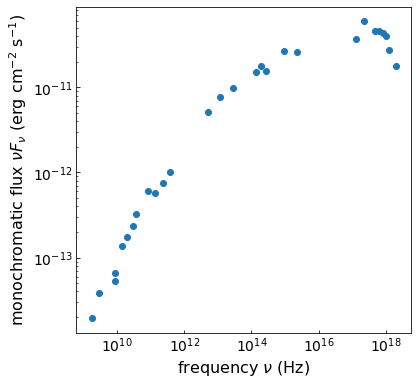

In [5]:
# load data
data = ascii.read('astr5710_mysteryobject1.csv',format='csv')

plt.figure(figsize=(6,6))
plt.loglog(data['nu'],data['nuFnu'],marker='o',linestyle='')
plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=16); plt.ylabel(r'monochromatic flux $\nu F_\nu$ (erg cm$^{-2}$ s$^{-1}$)',fontsize=16)

# Predict the inverse Compton spectrum of our mystery object

Last time, we started analyzing a synchrotron spectrum. Going through all the steps results in estimates of (roughly):

$B \simeq 8$ G, $n_e \simeq 10^4$ cm$^{-3}$, $\gamma_{\rm min} \simeq 5$, $\gamma_{\rm max} \simeq 10^5$

Using these estimates, we will make predictions for the inverse Compton power and spectrum from the object.

## 1. Scattering optical depth

The scattering optical depth of a uniform source of radius $R$ is approximately $\tau_{\rm sc} = n_e \sigma_T R$, where $\sigma_T \simeq 6.65 \times 10^{-25}$ cm$^2$ is the Thomson cross section, and here $R \simeq 1.5 \times 10^{14}$ cm

What is the scattering optical depth of the source? How many times on average does each photon scatter from an electron?

In [6]:
n_e = 10.0**4
sigma_t = 6.65E-25
R = 1.5E14
tau_sc = n_e * sigma_t * R
print(tau_sc)

9.975e-07


## 2. Inverse Compton spectrum

We discussed last time in class that the average energy loss for relativistic electrons to incoming photons ($\gamma \gg 1$) is $$\frac{E_1}{E_0} \simeq \gamma^2$$

where $E_1$ and $E_0$ are the photon energies after and before scattering. 

For the mystery object spectrum with a synchrotron spectrum peaking in the X-rays ($\nu \simeq 10^{18}$ Hz), roughly over what frequency range should you expect to see its inverse Compton spectrum? Based on the result from part 1, you may assume that nearly all of the inverse Compton spectrum is from photons that scatter once.

In [16]:
gammas = 5.0, 10.0**5
nu_peak = 10.0**18
nus = [g*g*nu_peak for g in gammas]
print(nus)

[2.5e+19, 1e+28]


## 3. Inverse Compton power

We showed in class that the total inverse Compton power can be calculated from the synchrotron power using the ratio $$\frac{P_{\rm IC}}{P_{\rm Syn}} = \frac{U_{\rm ph}}{U_B},$$

where $U_{\rm ph}$ is the energy density of the photon distribution before scattering, and $U_B = B^2/8\pi$ is the magnetic field energy density.

Estimate the inverse Compton power of the mystery object, using the value of $B$ above. A useful order of magnitude estimate of the photon energy density can be obtained from the total luminosity as $$U_{\rm ph} \sim \frac{L}{4\pi R^2 c},$$ where $L = 4\pi D^2 F$ is the bolometric (frequency-integrated) luminosity and $F$ is the bolometric flux. (The approximation corresponds to setting the observed intensity equal to the mean intensity.) You may further estimate $F \sim \nu_{\rm max} F_{\nu, \rm max}$, where $F_{\nu, \rm max}$ is the peak flux density of the synchrotron spectrum.

You can use an angular size of the source of $R/D \simeq 5 \times 10^{-11}$ radians.

In [21]:
R_D = 5.0E-11
F = 10.0**-10
U_ph = F / (R_D**2 * 3.0E10)
print(U_ph)
B = 8.0
U_B = B**2/(8 * np.pi)
P_ratio = U_ph / U_B
print(P_ratio)

1.3333333333333333
0.5235987755982988


## 4. Sketch your predicted inverse Compton spectrum

Using your results from parts 1-3, sketch your prediction for the inverse Compton spectrum of the mystery object, focusing on its relative total power and range of energies. As we'll discuss next week, for a power law distribution of electrons the shape of an inverse Compton spectrum closely mirrors that of the synchrotron spectrum. 

We'll compare with the observed spectrum on Monday.